In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import copy
import keras
import tensorflow as tf
import os
from random import shuffle 
from tqdm import tqdm 
%matplotlib inline

Using TensorFlow backend.


In [44]:
#load data, probably best to put the script in the folder with data
train_data = './train/'
test_data = './test/'

In [168]:
#GOOD = [1,0]
#BAD = [0,1]
def train_data_with_label():
    '''
    labels each image in the train folder
    '''
    train_images =[]

    good = train_data + 'good'
    bad = train_data + 'bad'
    
    for i in os.listdir(good):
        if i.endswith('.DS_Store'):
            pass
        else:
            path = os.path.join(good, i)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img,(100,100))
            train_images.append([np.array(img), 1])
            #print(i)
    for i in os.listdir(bad):
        if i.endswith('.DS_Store'):
            pass
        else:
            path = os.path.join(bad,i)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img,(100,100))
            train_images.append([np.array(img),0])
            #print(i)
    shuffle(train_images)
    return train_images

In [169]:
def test_data_with_label():
    '''
    labels each image in the test folder
    '''
    test_images =[]

    good = test_data + 'good'
    bad = test_data + 'bad'
    
    for i in os.listdir(good):
        if i.endswith('.DS_Store'):
            pass
        else:
            path = os.path.join(good, i)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img,(100,100))
            test_images.append([np.array(img), 1])
            #print(i)
    for i in os.listdir(bad):
        if i.endswith('.DS_Store'):
            pass
        else:    
            path = os.path.join(bad,i)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img,(100,100))
            test_images.append([np.array(img),0])
            #print(i)
    shuffle(test_images)
    return test_images

In [170]:
#reshaping might not be the best idea, maybe pad??
training_images = train_data_with_label()
testing_images = test_data_with_label()

In [187]:
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,100,100,1)
tr_lbl_data = np.array([i[1] for i in training_images])
tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,100,100,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

In [188]:
#convert to one hot label
tr_lbl_data=keras.utils.to_categorical(tr_lbl_data, num_classes=None, dtype='float32')
tst_lbl_data=keras.utils.to_categorical(tst_lbl_data, num_classes=None, dtype='float32')

In [189]:
print(tr_lbl_data.shape,tr_img_data.shape)
print(tr_lbl_data[4].shape)

(35, 2) (35, 100, 100, 1)
(2,)


In [190]:
from keras.models import Sequential 
from keras.layers import *
from keras.optimizers import * 
from keras.callbacks import *

In [196]:
model = Sequential()

model.add(InputLayer(input_shape=(100,100,1)))
model.add(Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),padding='same'))

model.add(Conv2D(filters=50,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),padding='same'))

model.add(Conv2D(filters=80,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(2,activation='relu'))
#model.add(Dropout(rate=0.2))
model.add(Dense(2,activation='softmax'))
optimizer = Adam(lr=1e-5)

model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
#model.fit(x=tr_img_data,y=tr_lbl_data,epochs=20,batch_size=5,validation_data=(tst_img_data,tst_lbl_data))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 50, 50, 50)        14450     
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 25, 25, 50)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 25, 25, 80)        36080     
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 13, 13, 80)        0         
_________________________________________________________________
dropout_72 (Dropout)         (None, 13, 13, 80)        0         
__________

In [198]:
model.fit(x=tr_img_data,y=tr_lbl_data,epochs=20,batch_size=1,validation_data=(tst_img_data,tst_lbl_data))

Train on 35 samples, validate on 9 samples
Epoch 1/20
35/35 [==============================] - 1s 22ms/step - loss: 1.8454 - acc: 0.8000 - val_loss: 3.0422 - val_acc: 0.7778
Epoch 2/20
35/35 [==============================] - 1s 22ms/step - loss: 1.2638 - acc: 0.8571 - val_loss: 3.5630 - val_acc: 0.7778
Epoch 3/20
35/35 [==============================] - 1s 22ms/step - loss: 1.4655 - acc: 0.8286 - val_loss: 3.5624 - val_acc: 0.7778
Epoch 4/20
35/35 [==============================] - 1s 23ms/step - loss: 1.0041 - acc: 0.8571 - val_loss: 2.8971 - val_acc: 0.7778
Epoch 5/20
35/35 [==============================] - 1s 22ms/step - loss: 2.2018 - acc: 0.6857 - val_loss: 3.4046 - val_acc: 0.7778
Epoch 6/20
35/35 [==============================] - 1s 22ms/step - loss: 1.0365 - acc: 0.8857 - val_loss: 3.2502 - val_acc: 0.7778
Epoch 7/20
35/35 [==============================] - 1s 21ms/step - loss: 0.5016 - acc: 0.9429 - val_loss: 3.1454 - val_acc: 0.7778
Epoch 8/20
35/35 [======================

[0.6916692831384187, 0.9545454545454546]


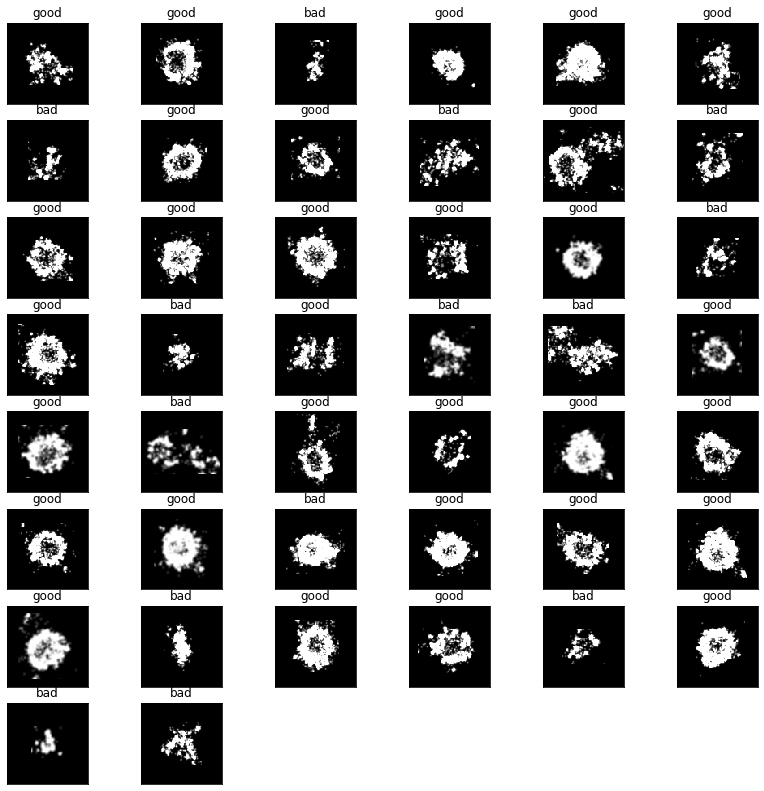

In [256]:
#subplot not necessary
#input data in this step and add function to seperate in os
fig = plt.figure(figsize=(14,14))
imgs = testing_images + training_images
for count, data in enumerate(imgs):
    y = fig.add_subplot(8,6,count+1)
    img = data[0]
    data = img.reshape(1,100,100,1)
    model_out=model.predict([data])
    if np.argmax(model_out)==1:
        str_label='good'
    else:
        str_label='bad'
    y.imshow(img,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

img =  np.array([i[0] for i in imgs]).reshape(-1,100,100,1)
lbl = np.array([i[1] for i in imgs])
lbl = keras.utils.to_categorical(lbl, num_classes=None, dtype='float32')
score = model.evaluate(img,lbl,verbose=0)
print(score)